In [1]:
import numpy as np
import pandas as pd
import pickle
from collections import Counter
import math, time, random, datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score,roc_curve,precision_score, recall_score, precision_recall_curve,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import statsmodels.api as sm


In [2]:
orders_full = pd.read_csv("orders_full_new_dum1.csv")
orders_full.head(5)
orders_full.drop(['ds', "Unnamed: 0"], 1, inplace=True)

In [3]:
orders_full['freight_price_ratio'] = orders_full['freight_value']/orders_full['y']

orders_full = orders_full.dropna()
orders_full['review_score'] = orders_full['review_score'].apply(lambda x: 1 if x >= 4 else 0)
orders_full.head()

,order_id,payment_installments,review_score,y,freight_value,customer_city_sao paulo,customer_city_rio de janeiro,customer_city_belo horizonte,customer_city_brasilia,customer_city_curitiba,...,product_category_name_english_computers_accessories,product_category_name_english_furniture_decor,product_category_name_english_housewares,product_category_name_english_cool_stuff,product_category_name_english_auto,product_category_name_english_garden_tools,product_photos_qty,late_delivery,Num_ordrs,freight_price_ratio
0,2e7a8482f6fb09756ca50c10d7bfc047,1.0,0,32.90,31.67,0,0,0,0,0,...,0,1,0,0,0,0,3.0,0,1,0.962614
1,2e7a8482f6fb09756ca50c10d7bfc047,1.0,0,39.99,31.67,0,0,0,0,0,...,0,1,0,0,0,0,2.0,0,1,0.791948
2,e5fa5a7210941f7d56d0208e4e071d35,3.0,0,59.50,15.56,0,0,0,0,0,...,0,0,0,0,0,0,1.0,0,1,0.261513
4,bfbd0f9bdef84302105ad712db648a6c,0.0,0,44.99,2.83,0,0,0,0,0,...,0,0,0,0,0,0,1.0,1,1,0.062903
5,bfbd0f9bdef84302105ad712db648a6c,0.0,0,44.99,2.83,0,0,0,0,0,...,0,0,0,0,0,0,1.0,1,1,0.062903


In [7]:
orders_full.isnull().any()

order_id                                               False
payment_installments                                   False
review_score                                           False
y                                                      False
freight_value                                          False
customer_city_sao paulo                                False
customer_city_rio de janeiro                           False
customer_city_belo horizonte                           False
customer_city_brasilia                                 False
customer_city_curitiba                                 False
customer_city_salvador                                 False
product_category_name_english_health_beauty            False
product_category_name_english_bed_bath_table           False
product_category_name_english_sports_leisure           False
product_category_name_english_computers_accessories    False
product_category_name_english_furniture_decor          False
product_category_name_en

In [8]:
orders_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118318 entries, 0 to 119132
Data columns (total 24 columns):
order_id                                               118318 non-null object
payment_installments                                   118318 non-null float64
review_score                                           118318 non-null int64
y                                                      118318 non-null float64
freight_value                                          118318 non-null float64
customer_city_sao paulo                                118318 non-null int64
customer_city_rio de janeiro                           118318 non-null int64
customer_city_belo horizonte                           118318 non-null int64
customer_city_brasilia                                 118318 non-null int64
customer_city_curitiba                                 118318 non-null int64
customer_city_salvador                                 118318 non-null int64
product_category_name_english_healt

In [9]:
orders_full.drop(["order_id"], 1, inplace=True)

In [10]:
orders_full.head()

,payment_installments,review_score,y,freight_value,customer_city_sao paulo,customer_city_rio de janeiro,customer_city_belo horizonte,customer_city_brasilia,customer_city_curitiba,customer_city_salvador,...,product_category_name_english_computers_accessories,product_category_name_english_furniture_decor,product_category_name_english_housewares,product_category_name_english_cool_stuff,product_category_name_english_auto,product_category_name_english_garden_tools,product_photos_qty,late_delivery,Num_ordrs,freight_price_ratio
0,1.0,0,32.90,31.67,0,0,0,0,0,0,...,0,1,0,0,0,0,3.0,0,1,0.962614
1,1.0,0,39.99,31.67,0,0,0,0,0,0,...,0,1,0,0,0,0,2.0,0,1,0.791948
2,3.0,0,59.50,15.56,0,0,0,0,0,0,...,0,0,0,0,0,0,1.0,0,1,0.261513
4,0.0,0,44.99,2.83,0,0,0,0,0,0,...,0,0,0,0,0,0,1.0,1,1,0.062903
5,0.0,0,44.99,2.83,0,0,0,0,0,0,...,0,0,0,0,0,0,1.0,1,1,0.062903


1    88722
0    29596
Name: review_score, dtype: int64


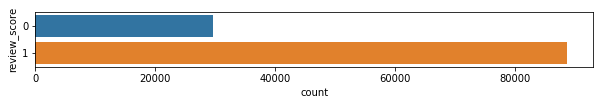

In [13]:

fig = plt.figure(figsize=(10,1))
sns.countplot(y='review_score', data=orders_full);
print(orders_full.review_score.value_counts())

In [14]:
X = orders_full[["payment_installments", 'y', 'freight_value', 'customer_city_sao paulo', "customer_city_rio de janeiro", 'customer_city_belo horizonte', 'customer_city_brasilia', "customer_city_curitiba", "customer_city_salvador", 'product_category_name_english_health_beauty', 'product_category_name_english_bed_bath_table', 'product_category_name_english_sports_leisure', 'product_category_name_english_computers_accessories',  'product_category_name_english_furniture_decor', 'product_category_name_english_housewares', 'product_category_name_english_cool_stuff', 'product_category_name_english_auto', 'product_category_name_english_garden_tools', "late_delivery", "product_photos_qty", "freight_price_ratio"]]
y = orders_full["review_score"]

## StandardScaler

In [181]:
from sklearn.preprocessing import StandardScaler
X_scaler = X
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X))
#X_scaled=Scaler.transform(X)
#X_scaler_train, X_scaler_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=40)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [182]:
# hold out 20% of the data for final testing
X_scaled, X_test, y, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=10)

In [183]:
#further partition X, y into datasets X_train, y_train (60% of original) and X_val, y_val (20%).
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=.25, random_state=3)

In [184]:
print(X_train.shape, X_val.shape, X_test.shape)

(70990, 21) (23664, 21) (23664, 21)


In [185]:
#set up the baseline model:
lr = LogisticRegression() 

In [186]:
#fit
lr.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [187]:
print("ROC AUC train score: {:6.4f}".format(roc_auc_score(y_train,lr.predict_proba(X_train)[:,1])))
print("ROC AUC validation score: {:6.4f}".format(roc_auc_score(y_val,lr.predict_proba(X_val)[:,1])))
print("ROC AUC test score: {:6.4f}".format(roc_auc_score(y_test,lr.predict_proba(X_test)[:,1])))

ROC AUC train score: 0.6311
ROC AUC validation score: 0.6232
ROC AUC test score: 0.6296


In [188]:
print("Accuracy test score: {:6.4f}".format(accuracy_score(y_test,lr.predict(X_test))))
print("Precision test score: {:6.4f}".format(precision_score(y_test,lr.predict(X_test))))
print("Recall test score: {:6.4f}".format(recall_score(y_test,lr.predict(X_test))))
print("F1 test score: {:6.4f}".format(f1_score(y_test,lr.predict(X_test))))

Accuracy test score: 0.7724
Precision test score: 0.7822
Recall test score: 0.9640
F1 test score: 0.8636


In [189]:
lr.coef_

array([[-1.04268909e-01,  3.40570551e-02, -3.04780896e-02,
         1.78829813e-02, -5.34245319e-02, -7.61666430e-04,
        -4.49811454e-03, -9.91187491e-03, -3.09158461e-02,
         4.37607674e-02, -8.34263679e-02,  2.54048299e-02,
        -5.11842754e-02, -6.20678621e-02,  2.68057856e-03,
         1.67804155e-02,  7.49130618e-03,  2.87742786e-04,
        -5.27659932e-01,  4.04018620e-02, -8.47636777e-02]])

In [194]:
def make_confusion_matrix(model, threshold=0.78):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    illicit_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(illicit_confusion, cmap=plt.cm.Greens, annot=True, square=True, fmt='d',
           xticklabels=['negative', 'positive'],
           yticklabels=['negative', 'positive']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

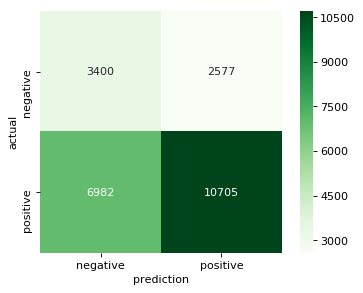

In [195]:
make_confusion_matrix(lr)

In [196]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

In [198]:
Coefficients = pd.DataFrame(zip(["payment_installments", 'y', 'freight_value', 'customer_city_sao paulo', "customer_city_rio de janeiro", 'customer_city_belo horizonte', 'customer_city_brasilia', "customer_city_curitiba", "customer_city_salvador", 'product_category_name_english_health_beauty', 'product_category_name_english_bed_bath_table', 'product_category_name_english_sports_leisure', 'product_category_name_english_computers_accessories',  'product_category_name_english_furniture_decor', 'product_category_name_english_housewares', 'product_category_name_english_cool_stuff', 'product_category_name_english_auto', 'product_category_name_english_garden_tools', "late_delivery", "product_photos_qty", "freight_price_ratio"],*lr.coef_),columns =['Features','Coefficients']).\
            sort_values(by="Coefficients",ascending=False).reset_index(drop=True).round(2)

In [199]:
Coefficients

,Features,Coefficients
0,product_category_name_english_health_beauty,0.04
1,product_photos_qty,0.04
2,y,0.03
3,product_category_name_english_sports_leisure,0.03
4,customer_city_sao paulo,0.02
5,product_category_name_english_cool_stuff,0.02
6,product_category_name_english_auto,0.01
7,product_category_name_english_housewares,0.00
8,product_category_name_english_garden_tools,0.00
9,customer_city_belo horizonte,-0.00


ROC AUC score =  0.6296160829248403


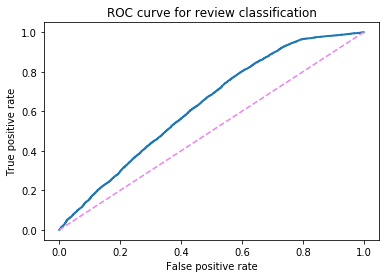

In [200]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for review classification');
print("ROC AUC score = ", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

In [201]:
# Instantiate model with 50 decision trees
rf = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [202]:
#fit
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [203]:
print("ROC AUC train score: {:6.4f}".format(roc_auc_score(y_train,rf.predict(X_train))))
print("ROC AUC validation score: {:6.4f}".format(roc_auc_score(y_val,rf.predict(X_val))))
print("ROC AUC test score: {:6.4f}".format(roc_auc_score(y_test,rf.predict(X_test))))

ROC AUC train score: 0.9563
ROC AUC validation score: 0.6612
ROC AUC test score: 0.6622


In [204]:
print("Precision test score: {:6.4f}".format(precision_score(y_test,lr.predict(X_test))))
print("Recall test score: {:6.4f}".format(recall_score(y_test,lr.predict(X_test))))
print("F1 test score: {:6.4f}".format(f1_score(y_test,lr.predict(X_test))))

Precision test score: 0.7822
Recall test score: 0.9640
F1 test score: 0.8636


In [205]:
rf.feature_importances_

array([0.08007414, 0.2205561 , 0.23090688, 0.0109369 , 0.00605867,
       0.00505823, 0.00468009, 0.00411345, 0.00248048, 0.00578331,
       0.00448692, 0.00548928, 0.0051035 , 0.00474174, 0.00646838,
       0.00378896, 0.00500827, 0.00422412, 0.0818895 , 0.05608614,
       0.25206494])

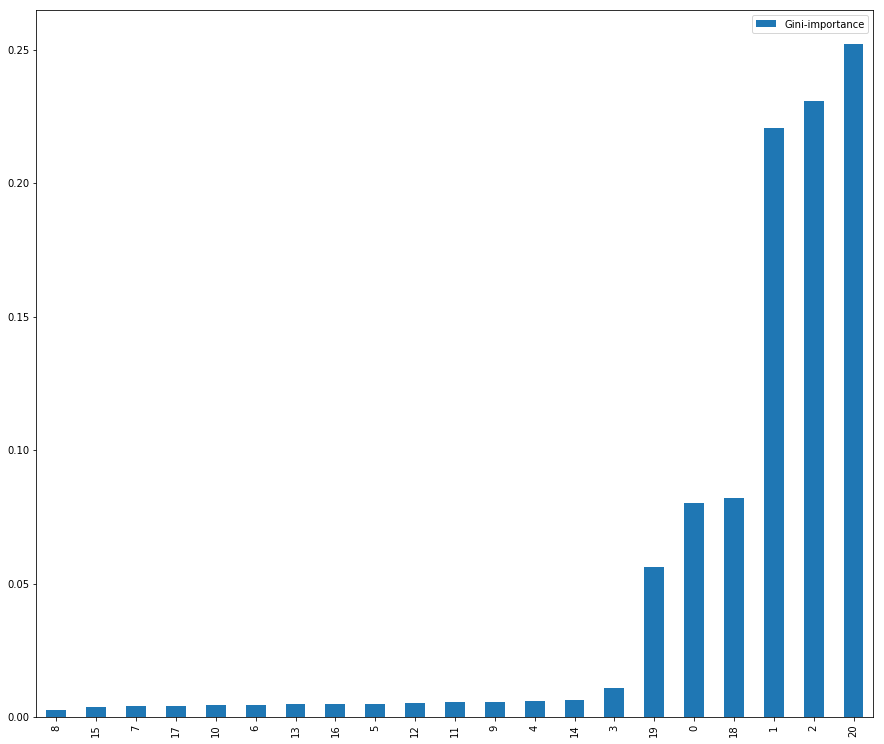

In [206]:
%matplotlib inline

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

importances.sort_values(by='Gini-importance').plot(kind='bar',figsize=(15,13));